# MIT xPRO
## Data Science and Big Data Analytics: Making Data-Driven Decisions Course

### Case Study 1.1.2: Finding Themes in the Project Description
The task in this study is to scrape some internet pages to collect the abstracts of scientific papers and categorize them in relevant topics.
As per the example document provided in the course, I will categorize the scraped abstracts in 5 different topics using the LDA algorithm from sklearn package.

#### Module Imports

In [5]:
# Basics
import numpy as np
import pandas as pd
import random
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Web scrapping
from bs4 import BeautifulSoup
import requests

# Natural Language processing
import re
import string
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *
from collections import Counter

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santos@us.ibm.com/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Web Scrapping and Parsing

In [8]:
# Page to scrape the professor's names
page ="https://www.eecs.mit.edu/people/faculty-advisors"

In [9]:
# Extraxct only text from the html
text = requests.get(page).text

In [12]:
# HTML Parsing
soup = BeautifulSoup(text, 'html.parser')

In [34]:
# Extract all the review blocks from the page
people_blocks = soup.find_all('div', class_='views-field views-field-title')

In [46]:
# Function to get professor's name list
def extractNames(block):
    names = []
    for row in block:
        name = row.find('span', class_='field-content card-title').text
        names.append(name)
    return names

In [48]:
# Store names list in a variable
professors = extractNames(people_blocks)

Here is the list of names scraped from the internet page "https://www.eecs.mit.edu/people/faculty-advisors":

Hal Abelson,Elfar Adalsteinsson,Fadel Adib,Anant Agarwal,Pulkit Agrawal,Akintunde Akinwande,Mohammad Alizadeh,Saman Amarasinghe,Jacob Andreas,Dimitri Antoniadis, Arvind,Hari Balakrishnan,Marc A. Baldo,Regina Barzilay,Adam Belay,Karl Berggren,Dimitri Bertsekas,Robert Berwick,Sangeeta Bhatia,Duane Boning,Louis Braida,Guy Bresler,Tamara Broderick,Rodney Brooks,Vladimir Bulovic,Michael Carbin,Vincent Chan,Anantha Chandrakasan,YuFeng (Kevin) Chen,Adam Chlipala,Isaac Chuang,Henry Corriga-Gibbs,Munther Dahleh,Luca Daniel,Constantinos Daskalakis,Randall Davis,Jesús del Alamo,Erik Demaine,Jack Dennis,Srini Devadas,David DeWitt,Fredo Durand,Joel Emer,Dirk R. Englund,Clifton Fonstad,David Forney,Dennis Freeman,William Freeman,Lawrence Frishkopf,James Fujimoto,Robert Gallager,Manya Ghobadi,David Gifford,Shafi Goldwasser,Polina Golland,Martha Gray,W. Eric L. Grimson,Alan Grodzinsky,John Guttag,Peter Hagelstein,Song Han,Ruonan Han,Jongyoon Han,Thomas Heldt,Frederick Hennie III,Berthold Horn,Qing Hu,Daniel Huttenlocher,Piotr Indyk,Erich Ippen,Phillip Isola,Tommi Jaakkola,Daniel Jackson,Patrick Jaillet,Stefanie Jegelka,M. Frans Kaashoek,Leslie Kaelbling,Yael Kalai,David Karger,John Kassakian,Dina Katabi,Manolis Kellis,James Kirtley, Jr.,Leslie Kolodziejski,Jing Kong,Tim Kraska ,Butler Lampson,Jeffrey Lang,Hae-Seung (Harry) Lee,Steven Leeb,Charles Leiserson,Jae Lim,Barbara Liskov,Luqiao Liu,Tomás Lozano-Pérez,Timothy Lu,Nancy Lynch,Samuel Madden,Aleksander Madry,Thomas Magnanti,Wojciech Matusik,Muriel Médard,Alexandre Megretski,Albert Meyer,Silvio Micali,Rob Miller,Sanjoy Mitter,Robert Morris,Joel Moses,Stefanie Mueller,Anand V Natarajan,Farnaz Niroui,Jelena Notaros,Kevin P. O'Brien,WillIam D. Oliver,Alan Oppenheim,Terry Orlando,Asuman Ozdaglar,Tomás Palacios,Ronald Parker,Pablo Parrilo,Paul Penfield, Jr.,David Perreault,Yury Polyanskiy,Jonathan Ragan-Kelley,Rajeev Ram,L. Rafael Reif,Negar Reiskarimian,Martin Rinard,Ronald Rivest,Ronitt Rubinfeld,Jennifer L.M. Rupp,Daniela Rus,Jerome Saltzer,Daniel Sanchez Martin,Arvind Satyanarayan ,Joel Schindall,Martin A. Schmidt,Stephen Senturia,Devavrat Shah,Jeffrey Shapiro,Nir Shavit,Max Shulaker,Julian Shun,Henry Smith,Charles Sodini,Armando Solar-Lezama,Justin Solomon,David Sontag,Suvrit Sra,Michael Stonebraker,Collin Stultz,Gerald Sussman,Vivienne Sze,Peter Szolovits,Russell Tedrake,Bruce Tidor,Antonio Torralba,John Tsitsiklis,Caroline Uhler,Vinod Vaikuntanathan,George Verghese,Joel Voldman,Stephen Ward,Cardinal Warde,Jacob White,Virginia Williams,Ryan Williams,Alan Willsky,Gerald Wilson,Gregory Wornell,Mengjia Yan,Markus Zahn,Nickolai Zeldovich,Lizhong Zheng,Victor Zue

In [52]:
# For this exercise, I will scrape results of only 8 professors
prof_subset = random.choices(professors, k=8)

Here the random can bring any names. For me, it brought:

John Kassakian, Jing Kong, Dina Katabi, Cardinal Warde, Anand V Natarajan, Tomás Palacios, Jelena Notaros and Shafi Goldwasser

In [70]:
# Search Terms scrape. The loop is creating the web address, getting the content and gathering the result in a list
results = []
for p in prof_subset:
    search = "https://arxiv.org/search/?query=" + "+".join(p.split())+"&searchtype=author&source=header"
    result = requests.get(search).text
    results.append(result)

In [140]:
# Concatenate all the results in a single html
for element in results:
    soup_search = BeautifulSoup(element,'html.parser')
    soup_search.body.append(element)

#### Data Cleanup and Formatting

In [364]:
# Extract all the review blocks from the page
abs_blocks = soup_search.find_all('span', class_='abstract-full has-text-grey-dark mathjax')

In [366]:
# Visualizing the first entry of the review blocks
abs_blocks[0]

<span class="abstract-full has-text-grey-dark mathjax" id="2009.10956v2-abstract-full" style="display: none;">
        We present the observational results from a detailed timing analysis of the black hole candidate EXO 1846-031 during its outburst in 2019 with the observations of Insight-HXMT, NICER and MAXI. This outburst can be classfied roughly into four different states. Type-C quasi-periodic oscillations (QPOs) observed by NICER (about 0.1-6Hz) and Insight-HXMT (about 0.7-8Hz) are also reported in this work. Meanwhile, we study various physical quantities related to QPO frequency.The QPO rms-frequency relationship in three energy band 1-10 keV indicates that there is a turning pointing in frequency around 2 Hz,which is similar to that of GRS 1915+105. A possible hypothesis for the relationship above may be related to the inclination of the source, which may require a high inclination to explain it. The relationships between QPO frequency and QPO rms,hardness,total fractional rms 

In [367]:
# Transforming the results in a list for final cleanup
abs_list = list(abs_blocks)

In [368]:
# Cleaning everything between "<...>" and creating a dataframe 
abs_df = pd.DataFrame([re.sub('<.*>', '', str(abs_list[i])) for i in range(len(abs_list))], columns=['text'])

In [369]:
# Removing '\n' from the abstracts
abs_df['text'] = [re.sub('\n', '',abs_df.text[i]) for i in range(len(abs_df))]

In [370]:
# Visualize the dataframe to be used for the next step (finding themes)
abs_df.head(5)

,text
0,We present the observational results f...
1,Low-frequency quasi-periodic oscillati...
2,Machine learning has demonstrated grea...
3,"In this paper, we study $(G,Ï_Ï)$-eq..."
4,A polarization-independent reconfigura...


In [86]:
# Save cleaned file to CSV
abs_df.to_csv('abstracts_df.csv')

#### Creating a Word Cloud

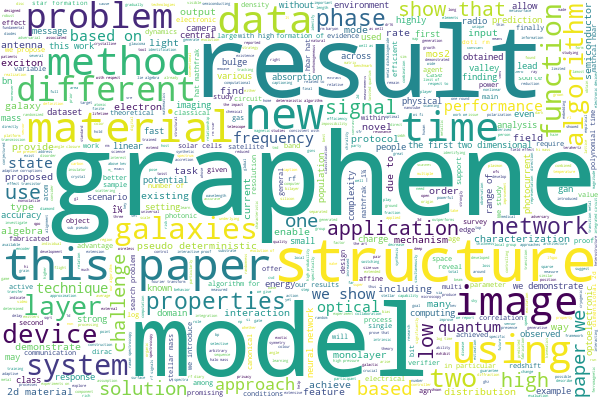

In [33]:
# WordCloud
from wordcloud import WordCloud

# Generate the text
text = abstracts

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3,
                      contour_color='steelblue', width=600, height=400)

# Generate a word cloud
wordcloud.generate(abstracts)

# Visualize the word cloud
wordcloud.to_image()

#### Natural Language Processing

In [4]:
# Extract the column with the abstracts and change all to lower case
abstracts = abs_df.text
abstracts = " ".join(abstracts).lower()

In [5]:
# Tokenize abstracts
tokens = word_tokenize(abstracts)

In [6]:
# Cleaning punctuation
exclude = set(string.punctuation)
tokens_no_punctuation = [word for word in tokens if word not in exclude]

In [7]:
# Load stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [8]:
# Remove stopwords
tokens_clean = [word for word in tokens_no_punctuation if word not in stopwords]

In [9]:
# Count most frequent words
counts = Counter(tokens_clean)
counts_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()

In [12]:
# Correct column names
counts_df.columns = ['word','frequence']

In [34]:
# Sort Values
counts_df.sort_values(by='frequence', ascending=False, inplace=True)

In [35]:
# Create a new dataframe with the top 10 words
top10 = counts_df.head(10)

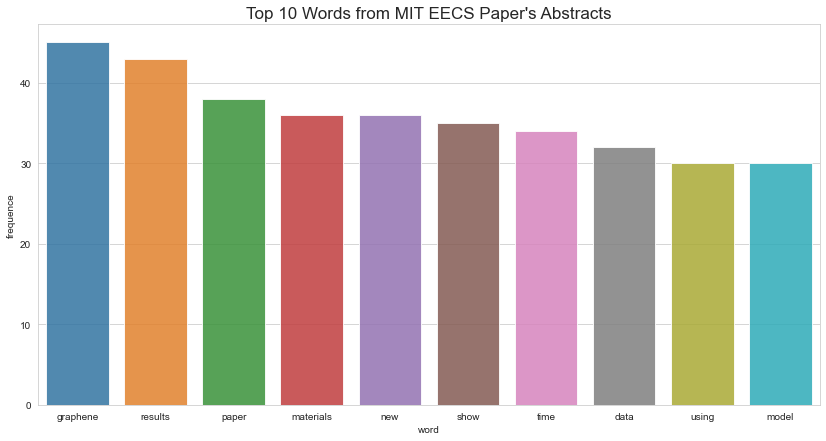

In [36]:
# Plot the 10 most frequent words
plt.figure(figsize=(14,7))
sns.barplot(x='word', y= 'frequence', data=top10, alpha=0.85)
plt.title('Top 10 Words from MIT EECS Paper\'s Abstracts', size=17)
plt.show()

#### LDA modeling

In [46]:
abstracts = abs_df.text

In [49]:
# Remove punctuation
abstracts = abstracts.map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
abstracts = abstracts.map(lambda x: x.lower())

In [53]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

In [54]:
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(abstracts)

In [57]:
# Parameters
number_topics = 5
number_words = 7

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

The function below will:
* Get all the words contained in the vectorized data (*abstracts*);
* Create a *for loop* with a tuple of (topic_index, topic#) for each component from the lda model (which is an array with lists of numbers representing the words in each topic);
* Next the function will iterate over the words, selecting only those with higher frequency/ relevant to the topic;
* Present the result printed on the screen.

In [106]:
# Function to Print each category and its words
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_index, topic in enumerate(model.components_):
        print(f"\nTopic #{topic_index}:")
        print(" , ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [95]:
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
networks , image , model , galaxies , properties , materials , population

Topic #1:
problems , based , pseudo , time , 2d , deterministic , graphene

Topic #2:
mathfrak , algebra , î¼ , quantum , paper , type , hbar

Topic #3:
rm , log , mass , rate , star , adaptive , m_

Topic #4:
graphene , electron , angle , dirac , reid , galaxies , valley


#### Analyzing our LDA Results

In [7]:
# Listing our topics and words
topics = {'topic0':['networks' , 'image' , 'model' , 'galaxies' , 'properties' , 'materials' , 'population'],
          'topic1':['problems' , 'based' , 'pseudo' , 'time' , '2d' , 'deterministic' , 'graphene'],
          'topic2':['mathfrak' , 'algebra' , 'î¼' , 'quantum' , 'paper' , 'type' , 'hbar'],
          'topic3':['rm' , 'log' , 'mass' , 'rate' , 'star' , 'adaptive' , 'm_'],
          'topic4':['graphene' , 'electron' , 'angle' , 'dirac' , 'reid' , 'galaxies' , 'valley']}

In [8]:
# Function that takes a list of words and a text as input and count how many times the words in the list appear in the text
def count_words(words, text):
    counter = 0
    for word in words:
        for w in text.split():
            if word == w:
                counter+= 1
    return counter

In [9]:
# Function to classify each abstract in a topic by verifying the topic that has more words in it.
# For each abstract, I will create a dictionary {topic: qty words from the list} and then I will check what is the key in the dictionary
# with the highest number, wich will be the topic number to be added to a list and returned.

def assign_topic(topic, text):
    assign = []
    for row in text:
        topic_counts = {}
        for key, value in topic.items():
            topic_counts[key] = count_words(value, row) #use function previously created
        assign.append(max(topic_counts, key=lambda k: topic_counts[k]))
    return assign

In [10]:
# The list of topics that will go in the dataframe
topics_list = assign_topic(topics, abs_df.text)

In [11]:
abs_df['topics'] = topics_list

In [12]:
abs_df.drop('Unnamed: 0', axis=1).head()

,text,topics
0,We present the observational results f...,topic3
1,Low-frequency quasi-periodic oscillati...,topic0
2,Machine learning has demonstrated grea...,topic0
3,"In this paper, we study $(G,Ï_Ï)$-eq...",topic2
4,A polarization-independent reconfigura...,topic1


#### Plotting the Pie Chart with the Topics Distribution

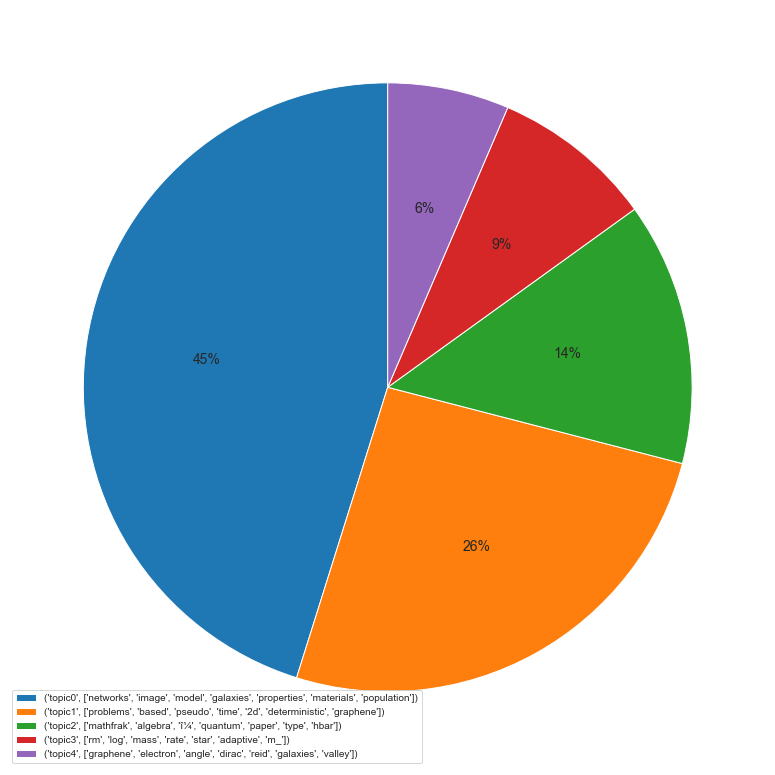

In [18]:
plt.figure(figsize=(14,14))
labels = topics.items()
sizes = abs_df.topics.value_counts()
plt.pie(sizes, autopct='%1.f%%', startangle=90, textprops={'fontsize': 14})
plt.legend(labels, loc = 'best')
plt.show()

### The End